In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter('ignore')
from classes.model_pipeline import ModelPipeline
from classes.utils import gather_data_from_folders
from classes.text_features import TextFeatureExtractor
from dotenv import load_dotenv
import os
load_dotenv();

[nltk_data] Downloading package punkt to /home/krystian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/krystian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/krystian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/krystian/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
playlists_dir = 'audio_sentiment_classifier/playlists'
playlists_dir = os.path.join("/".join(os.path.abspath(os.path.realpath(__name__)).split("/")[:-1]), "playlists")
df = gather_data_from_folders(playlists_dir)

Loading CSV file: /home/krystian/Python/Jupyter-projects/thesis/songs_analysis/playlists/final download 1/final download 1.csv
Loading CSV file: /home/krystian/Python/Jupyter-projects/thesis/songs_analysis/playlists/Every song in the world 🌍 /Every song in the world 🌍 .csv
Loading CSV file: /home/krystian/Python/Jupyter-projects/thesis/songs_analysis/playlists/final download 2/final download 2.csv


In [4]:
# Fixing the dtypes
int_columns = ['duration_ms', 'album_release_year']
df[int_columns] = df[int_columns].astype(int)

df.key = df.key.astype('category')
df['mode'] = df['mode'].astype('category')
df.time_signature = df.time_signature.astype('category')

In [5]:
tfe = TextFeatureExtractor()
df = tfe.add_features(df)

In [6]:
target = 'valence'

In [7]:
cat_features = [ f for f in df.select_dtypes(include=['category']).columns if f != target ]
num_features = [ f for f in df.select_dtypes(include=['number']).columns if f != target ]

In [8]:
model = ModelPipeline(df, target_column=target, num_features=num_features, cat_features=cat_features)
model.get_pipeline()

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer()),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['popularity',
                                                                                        'album_release_year',
                                                                                        'duration_ms',
                                                                                        'danceability',
                                                                                        'energy',
                                                                                        'loudness',
                                                                                        'speechiness',
                                                                                        'acousticness',
                                                                                        'instrumentalness',
                                                                                        'liveness',
                                                                                        'tempo',
                                                                                        'mfcc_1',
                                                                                        'mfcc_2'...
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore'))]),
                                                                                       ['key',
                                                                                        'mode',
                                                                                        'time_signature'])])),
                                                     ('model',
                                                      RandomForestRegressor(random_state=42))]),
                           transformer=Pipeline(steps=[('log_transformer',
                                                        FunctionTransformer(check_inverse=False,
                                                                            func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>)),
                                                       ('scaler',
                                                        StandardScaler())]))

Pipeline Progress:   0%|          | 0/6 [00:00<?, ?step/s]

 97%|=================== | 638/658 [00:35<00:01]       

,Metric,Value
0,Mean Absolute Error,0.122030
1,Mean Squared Error,0.024933
2,Root Mean Squared Error,0.157903
3,R-squared,0.567231


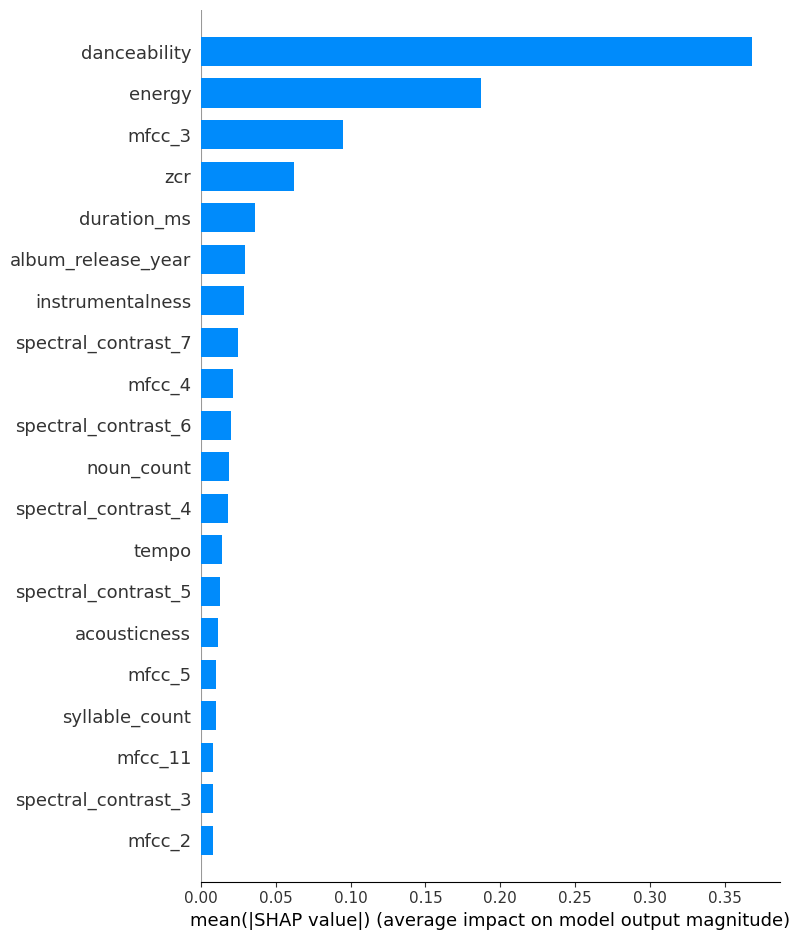

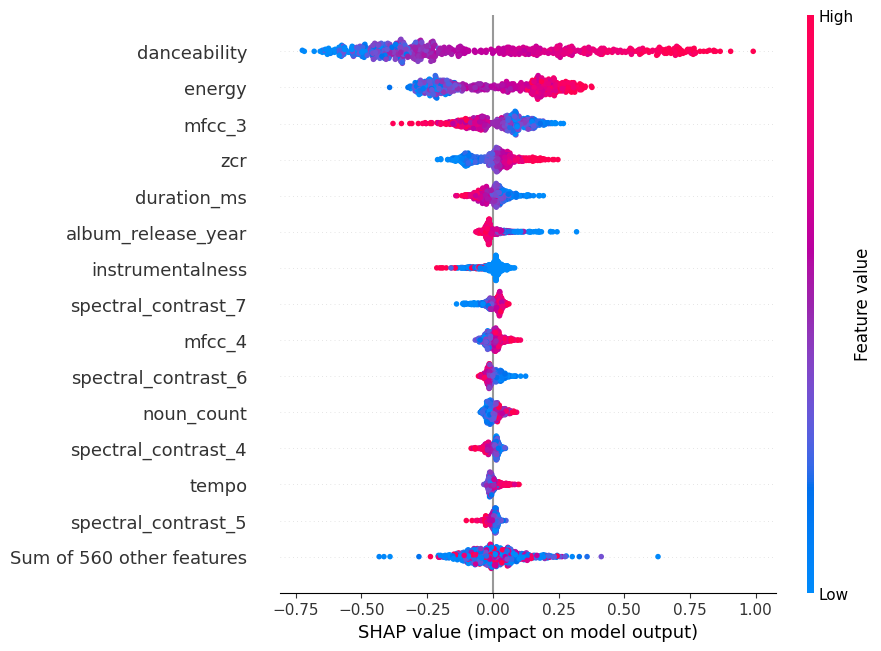

CPU times: user 58.5 s, sys: 1.42 s, total: 59.9 s
Wall time: 58.4 s


In [9]:
%%time
model.run_pipeline(f'dashboard/results/{target}')